In [10]:
import networkx as nx
import numpy as np
import utilities as util
import os
import seaborn as sns
from tabulate import tabulate

In [11]:
os.chdir('../')
df_reply = util.create_df_from_edge_list('network-data/higgs-reply_network.edgelist')
os.chdir('Network-analysis/')
G_reply = util.create_graph_from_df(df_reply, edge_attr='Day', isDirected=True)

KeyboardInterrupt: 

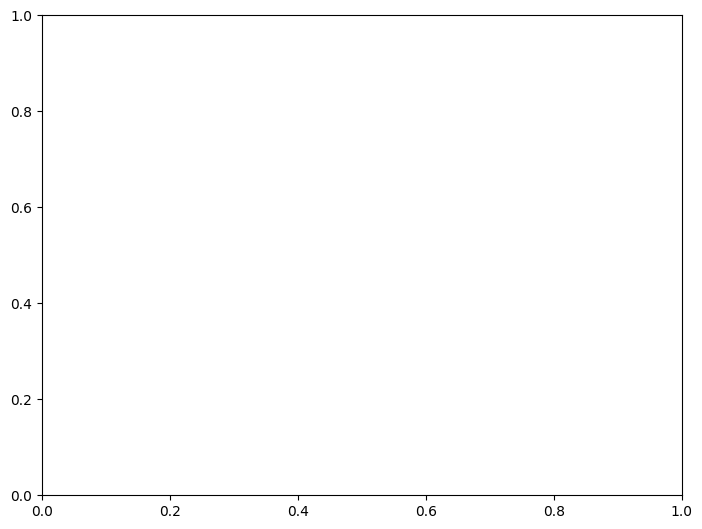

In [3]:
nx.draw(G_reply, with_labels=True)

In [3]:
num_nodes = G_reply.number_of_nodes()
num_edges = G_reply.number_of_edges()
avg_degree = util.get_avg_degree(G_reply)
var_degree = util.get_var_degree_distribution(G_reply)
std_degree = np.sqrt(var_degree)

[(161345, 1), (8614, 5), (428368, 1), (11792, 6), (77904, 4), (10701, 3), (124554, 1), (286277, 1), (194873, 2), (341375, 1), (16460, 83), (436133, 1), (220, 470), (274148, 1), (274149, 1), (12866, 4), (22252, 2), (425029, 1), (35248, 16), (126440, 1), (39410, 7), (279630, 1), (179783, 1), (107949, 1), (322, 9), (387599, 1), (456, 8), (158380, 1), (52504, 1), (201087, 1), (191708, 1), (345941, 1), (345940, 1), (402405, 1), (190354, 1), (3228, 5), (13537, 2), (126681, 1), (88, 1071), (27095, 1), (8438, 3), (245841, 1), (138795, 2), (30798, 1), (318765, 1), (3726, 20), (424421, 1), (49154, 3), (57105, 5), (188537, 1), (146177, 2), (129481, 1), (351168, 1), (30359, 1), (4986, 8), (256008, 2), (79530, 1), (188556, 1), (455874, 2), (2177, 66), (20187, 8), (28919, 1), (53342, 1), (53360, 1), (307829, 1), (358743, 1), (271255, 1), (220962, 2), (307876, 1), (377924, 1), (310821, 2), (1574, 41), (67087, 2), (7034, 1), (427962, 1), (12508, 4), (222612, 1), (144131, 1), (55655, 1), (72698, 2), (2

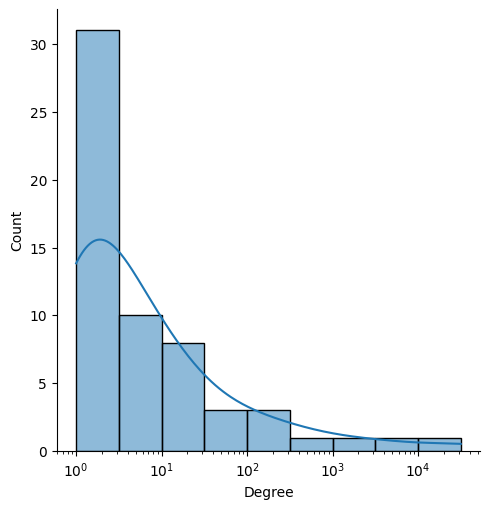

In [4]:
degree_distribution = util.get_degree_distribution(G_reply)
ax = sns.displot(degree_distribution, kde=True, log_scale=True)
ax.set(xlabel='Degree', ylabel='Count')

In [9]:
print(nx.is_connected(G_reply))

False


In [7]:
# Average shortest path length
# avg_shortest_path = nx.average_shortest_path_length(G_reply) NetworkXError: Graph is not fully connected
# Get all shortest paths
# shortest_paths = dict(nx.all_pairs_shortest_path_length(G_reply))
# Diameter
# diameter = nx.diameter(G_reply) NetworkXError: Found infinite path length because the digraph is not strongly connected.
# Betweenness centrality
betweenness = nx.betweenness_centrality(G_reply)
# Clustering coefficient
clustering = nx.average_clustering(G_reply)
# Calculate the degree correlation coefficient
degree_assortativity = nx.degree_assortativity_coefficient(G_reply)
# Largest eigenvalue
A = nx.adjacency_matrix(G_reply).todense()
eigenvalues, _ = np.linalg.eig(A)
lambda1 = max(eigenvalues)

KeyboardInterrupt: 

In [6]:
# Put all metrics in a table, to implement this in the report.
table = [
    ["Number of nodes", num_nodes],
    ["Number of edges", num_edges],
    ["Average degree", round(avg_degree, 2)],
    ["Standard deviation degree",round(std_degree, 2)],
    ["Betweenness",round(betweenness, 2)],
    ["Degree assortativity", round(degree_assortativity, 2)],
    ["Clustering coefficient",round(clustering, 2)],
    ["Largest eigenvalue",round(lambda1, 2)]
    ]
headers = ["Metric", "Value"]
print(tabulate(table, headers, tablefmt="fancy_grid", numalign="right"))

NameError: name 'betweenness' is not defined